In [50]:
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
# Load data from CSV file
df = pd.read_csv("crime_dataset.csv")

In [52]:
# Define and Fit Label Encoders
le_location = LabelEncoder()
le_crime = LabelEncoder()

df["Location"] = le_location.fit_transform(df["Location"])
df["CrimeType"] = le_crime.fit_transform(df["CrimeType"])
df[["Year", "Month"]] = df["Date"].str.split('-', expand=True)
df.drop("Date", axis=1, inplace=True)
df[["Year", "Month"]] = df[["Year", "Month"]].astype(int)

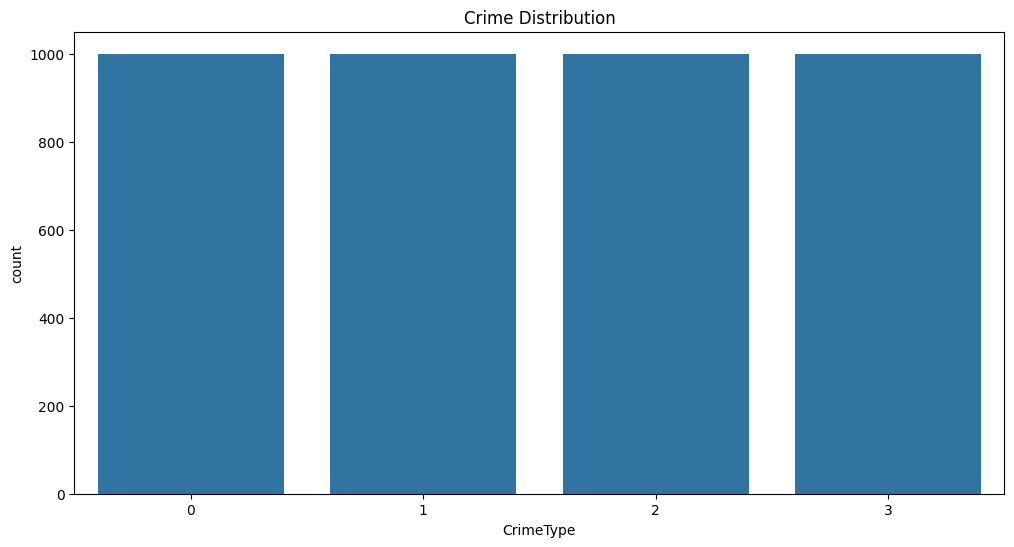

In [53]:
# Data Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x="CrimeType", data=df)
plt.title("Crime Distribution")
plt.show()


In [54]:
df["Count"] = df.groupby(["Location", "Year", "Month", "CrimeType"])["CrimeType"].transform("count")


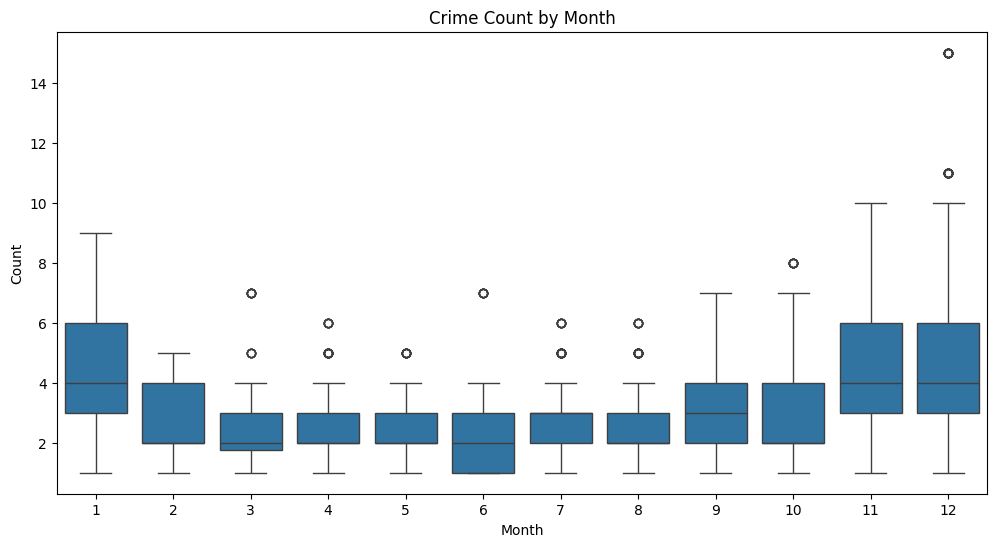

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="Count", data=df)
plt.title("Crime Count by Month")
plt.show()


In [56]:
# Train-Test Split
X = df.drop("Count", axis=1)
y = df["Count"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Train Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [58]:
import joblib

# Save the model
joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [59]:
# Predict and Evaluate
y_pred = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


Mean Absolute Error: 0.4047625
Mean Squared Error: 0.525079875


In [60]:
print("Model Accuracy (R² Score):", r2_score(y_test, y_pred) * 100, "%")


Model Accuracy (R² Score): 87.53426646422822 %


In [61]:
y_pred

array([ 1.87,  4.45,  2.82,  3.13,  4.08,  5.96,  1.73,  6.  ,  2.83,
        2.17,  1.84,  3.96,  1.08,  1.58,  4.15,  2.23,  5.  ,  2.09,
        1.97, 10.  ,  3.95,  2.72,  3.12,  1.64,  2.84,  2.1 ,  1.08,
        4.95,  3.44,  1.96,  1.75,  2.75,  2.76,  3.76,  4.04,  1.99,
        5.  ,  2.15,  2.8 ,  2.94,  3.92,  3.11,  1.5 ,  2.88,  1.87,
        3.12,  3.83,  3.06,  7.83,  6.18,  3.86,  2.  ,  9.  ,  2.  ,
        3.06,  2.29,  6.01,  4.61,  1.3 ,  3.93,  3.  ,  3.81,  1.86,
        6.96,  1.99,  7.  ,  2.41,  4.  ,  2.53,  4.94,  2.39,  8.96,
        1.61,  5.99,  6.18,  2.91,  3.44,  2.2 ,  6.  ,  4.92,  3.93,
        1.91,  4.99,  8.  ,  4.9 ,  2.94,  3.83,  2.32,  6.05,  2.73,
        4.72,  4.6 ,  3.7 ,  1.85,  5.  ,  3.5 ,  3.01,  6.9 ,  3.9 ,
        6.92,  8.96,  1.74,  4.03,  2.81,  6.97,  2.37,  2.23,  3.99,
        4.04,  2.31, 10.  ,  4.61,  1.42,  2.9 ,  2.92, 11.  ,  1.93,
        4.11,  2.94,  6.  ,  1.06,  2.51,  3.97,  1.91,  3.88,  3.93,
        8.98,  2.81,

In [62]:
# Generate Future Data (Next 6 Months)
latest_year = df["Year"].max()
latest_month = df["Month"].max()

future_dates = []
for i in range(1, 12):  # Next 6 months
    new_month = latest_month + i
    new_year = latest_year
    if new_month > 12:
        new_month -= 12
        new_year += 1
    future_dates.append((new_year, new_month))

future_df = pd.DataFrame(future_dates, columns=["Year", "Month"])

In [63]:
# Expand for all Locations & Crime Types
locations = df["Location"].unique()
crimes = df["CrimeType"].unique()

future_entries = []
for loc in locations:
    for crime in crimes:
        for year, month in future_dates:
            future_entries.append([loc, crime, year, month])

future_df = pd.DataFrame(future_entries, columns=["Location", "CrimeType", "Year", "Month"])

In [64]:
# Ensure future_df has the same columns as X_train
future_df = future_df[X_train.columns]  # Select only relevant columns

# Predict Crime Count
future_df["Predicted_Count"] = model.predict(future_df)


In [65]:
# Decode Location & Crime Names
future_df["Location"] = le_location.inverse_transform(future_df["Location"])
future_df["CrimeType"] = le_crime.inverse_transform(future_df["CrimeType"])

In [66]:
# Display Predictions
print(future_df)

         CrimeType  Location  Year  Month  Predicted_Count
0    Drink & Drive  Borivali  2025      1             5.00
1    Drink & Drive  Borivali  2025      2             2.24
2    Drink & Drive  Borivali  2025      3             4.90
3    Drink & Drive  Borivali  2025      4             2.22
4    Drink & Drive  Borivali  2025      5             3.98
..             ...       ...   ...    ...              ...
699     Kidnapping     Kurla  2025      7             1.38
700     Kidnapping     Kurla  2025      8             1.17
701     Kidnapping     Kurla  2025      9             1.24
702     Kidnapping     Kurla  2025     10             1.41
703     Kidnapping     Kurla  2025     11             3.52

[704 rows x 5 columns]


In [67]:
# Save predictions to CSV
future_df.to_csv("top5_predicted_crime_data.csv", index=False)

In [68]:
# Select top 5 locations for each (Crime, Year, Month) group
top5_df = future_df.groupby(["CrimeType", "Year", "Month"]).apply(lambda x: x.nlargest(5, "Predicted_Count")).reset_index(drop=True)

# Save to CSV
top5_df.to_csv("100percent.csv", index=False)

In [ ]:
import pickle

with open("best_model.pkl", "rb") as file:
    model = pickle.load(file)

print(type(model))
# Define locations and crime types
stations = ["Churchgate", "Mumbai Central", "Dadar", "Bandra", "Andheri", "Borivali", "Virar", "CSMT", "Kurla", "Ghatkopar", "Thane", "Kalyan", "Vashi", "Panvel", "Vile Parle", "Dombivali"]
crime_types = ["Kidnapping", "Murder", "Burglary", "Drink & Drive"]

# Generate Future Data (Next 6 Months)
latest_year = 2024  # Predict for 2025
latest_month = 12

future_dates = []
for i in range(1, 7):  # Next 6 months
    new_month = latest_month + i
    new_year = latest_year
    if new_month > 12:
        new_month -= 12
        new_year += 1
    future_dates.append((new_year, new_month))

future_entries = []
for loc in stations:
    for crime in crime_types:
        for year, month in future_dates:
            future_entries.append([loc, crime, year, month])

future_df = pd.DataFrame(future_entries, columns=["Location", "CrimeType", "Year", "Month"])

# Predict Crime Count using trained model
future_df["Predicted_Count"] = model.predict(future_df)

# Function to get predicted crime count for a given month and crime type
def get_crime_predictions(month, crime_type):
    filtered_df = future_df[(future_df["Month"] == month) & (future_df["CrimeType"] == crime_type)]
    return filtered_df[["Location", "Predicted_Count"]]

# Example Usage
month_input = 3  # March 2025
crime_input = "Murder"

predictions = get_crime_predictions(month_input, crime_input)
print(predictions)


FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [ ]:
print(type(model))


<class 'numpy.ndarray'>
